In [28]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt

In [4]:
def get_samesubject_sampleids(mdf, mkey, mvals, msk="subject_id", axis=1, return_subjectid=False):
    """
    import pandas as pd
    mdf = pd.DataFrame({
        "01_A": ["01", "A"],
        "01_B": ["01", "B"],
        "02_A": ["02", "A"],
        "02_B": ["02", "B"],
    }, index=["subject_id", "group"])
    >>> get_samesubject_sampleids(mdf, "group", ["A", "B"])
    [['01_A', '02_A'], ['01_B', '02_B']]
    >>> get_samesubject_sampleids(mdf, "group", ["A", "B"], axis=0)
    [['01_A', '01_B'], ['02_A', '02_B']]
    """
    def query_col(df, key, val):
        return df.loc[:, df.loc[key, :] == val]

    m = "metadata table is not unique by -mk and -msk"
    subject_ids = sorted(set(mdf.loc[msk, :]))
    sample_ids = []
    for mval in mvals:
        _sample_ids = []
        for subject_id in subject_ids:
            mdf_ext_step1 = query_col(mdf, msk, subject_id)
            mdf_ext_step2 = query_col(mdf_ext_step1, mkey, mval)
            if mdf_ext_step2.shape[1] != 1:
                raise ValueError(m)
            _sample_ids.append(mdf_ext_step2.columns[0])
        sample_ids.append(_sample_ids)

    if return_subjectid and axis == 1:
        return sample_ids, subject_ids
    elif not return_subjectid and axis == 1:
        return sample_ids
    elif return_subjectid and axis == 0:
        return [list(x) for x in zip(*sample_ids)], subject_ids
    elif not return_subjectid and axis == 0:
        return [list(x) for x in zip(*sample_ids)]


def draw_boxplot(data, labels, colors=None, title=None, show_xlabel=None,
                 dict_plt_adjust=None):
    # main
    bp = plt.boxplot(data,
                     notch=0,
                     labels=labels,
                     sym='.',
                     widths=0.66,
                     vert=True, whis=1.5,
                     patch_artist=True,
                     flierprops={
                        "marker": "k",
                        "markerfacecolor": "k",
                        "markersize": 12,
                        "linestyle": "none",
                        "markeredgecolor": "k"
                     })

    # config - boxplot config
    # set boxplot line color
    lw = 1.5
    for box in bp['boxes']:
        box.set(color="black", linewidth=lw)
    for box in bp['medians']:
        plt.setp(box, color="black", linewidth=lw)
    for box in bp['caps']:
        plt.setp(box, color="black", linewidth=lw)
    for box in bp['whiskers']:
        plt.setp(box, ls="solid", color="black", linewidth=lw)

    # set boxplot color
    if colors is not None:
        for box, color in zip(bp["boxes"], colors):
            box.set_facecolor(color)
    else:
        for box in bp['boxes']:
            box.set_facecolor("white")

    # config - general plot config
    # set title
    if title is not None:
        plt.title(title)

    # set xlabel?
    if not show_xlabel:
        plt.gca().tick_params(labelbottom="off", bottom="off")

    # set adjust?
    if dict_plt_adjust is not None:
        # default value is this
        # d = {"left": 0.125, "right": 0.9, "bottom": 0.1, "top": 0.9}
        plt.subplots_adjust(**dict_plt_adjust)

    # hidden migi and ue
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    # set about tick
    plt.tick_params(labelsize=8, length=2, width=0.5,
                    pad=0.1, top=False, right=False)


In [2]:
df = pd.read_csv("../data_input/nm.all_tp.tsv", sep="\t", index_col=0)
me = pd.read_csv("../data_input/me.all_tp.tsv", sep="\t", index_col=0)

In [23]:
me

,C_01_0w,C_01_2w,C_01_4w,T_02_0w,T_02_2w,T_02_4w,T_03_0w,T_03_2w,T_03_4w,C_04_0w,...,C_80_4w,C_82_0w,C_82_2w,C_82_4w,T_85_0w,T_85_2w,T_85_4w,T_87_0w,T_87_2w,T_87_4w
timepoint,0w,2w,4w,0w,2w,4w,0w,2w,4w,0w,...,4w,0w,2w,4w,0w,2w,4w,0w,2w,4w
group_raw,B,B,B,A,A,A,A,A,A,B,...,B,B,B,B,A,A,A,A,A,A
group,C,C,C,T,T,T,T,T,T,C,...,C,C,C,C,T,T,T,T,T,T
group_timepoint,C_0w,C_2w,C_4w,T_0w,T_2w,T_4w,T_0w,T_2w,T_4w,C_0w,...,C_4w,C_0w,C_2w,C_4w,T_0w,T_2w,T_4w,T_0w,T_2w,T_4w
subject_id,01,01,01,02,02,02,03,03,03,04,...,80,82,82,82,85,85,85,87,87,87
sex,male,male,male,female,female,female,female,female,female,female,...,female,male,male,male,female,female,female,female,female,female
age,55,55,55,42,42,42,39,39,39,46,...,37,39,39,39,35,35,35,48,48,48


In [11]:
# mkey = "timepoint"
# mskey = "subject_id"
# mv1s = ["0w", "0w"]
# mv2s = ["2w", "4w"]
# out_df = pd.DataFrame()
# out_me = pd.DataFrame()
# for mv1, mv2 in zip(mv1s, mv2s):
#     (sid_ctrls, sid_tests), subject_ids = get_samesubject_sampleids(me, mkey, [mv1, mv2], msk=mskey, return_subjectid=True)
#     for sid_ctrl, sid_test, subject_id in zip(sid_ctrls, sid_tests, subject_ids):
#         new_sid = f"{subject_id}_{mv2}{mv1}"
#         out_df[new_sid] = df[sid_test] - df[sid_ctrl]
#         for ind in me.index:
#             val_ctrl = me.loc[ind, sid_ctrl]
#             val_test = me.loc[ind, sid_test]
#             if val_ctrl == val_test:
#                 out_me.loc[ind, new_sid] = val_ctrl
#             else:
#                 out_me.loc[ind, new_sid] = f"{val_test}{val_ctrl}"
# out_me_c = out_me.T.query("group == 'C'").T
# out_me_t = out_me.T.query("group == 'T'").T

In [24]:
me_c = me.T.query("group == 'C'").T
me_t = me.T.query("group == 'T'").T

In [25]:
me_c

,C_01_0w,C_01_2w,C_01_4w,C_04_0w,C_04_2w,C_04_4w,C_05_0w,C_05_2w,C_05_4w,C_06_0w,...,C_75_4w,C_78_0w,C_78_2w,C_78_4w,C_80_0w,C_80_2w,C_80_4w,C_82_0w,C_82_2w,C_82_4w
timepoint,0w,2w,4w,0w,2w,4w,0w,2w,4w,0w,...,4w,0w,2w,4w,0w,2w,4w,0w,2w,4w
group_raw,B,B,B,B,B,B,B,B,B,B,...,B,B,B,B,B,B,B,B,B,B
group,C,C,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
group_timepoint,C_0w,C_2w,C_4w,C_0w,C_2w,C_4w,C_0w,C_2w,C_4w,C_0w,...,C_4w,C_0w,C_2w,C_4w,C_0w,C_2w,C_4w,C_0w,C_2w,C_4w
subject_id,01,01,01,04,04,04,05,05,05,06,...,75,78,78,78,80,80,80,82,82,82
sex,male,male,male,female,female,female,female,female,female,female,...,female,female,female,female,female,female,female,male,male,male
age,55,55,55,46,46,46,49,49,49,30,...,37,31,31,31,37,37,37,39,39,39


In [27]:
vals_c_0w = []
vals_c_2w = []
vals_c_4w = []
vals_t_0w = []
vals_t_2w = []
vals_t_4w = []
sample_id_sets_list = get_samesubject_sampleids(me_c, "timepoint", ["0w", "2w", "4w"], axis=0)
for sample_id_sets in sample_id_sets_list:
    sample_id_0w, sample_id_2w, sample_id_4w = sample_id_sets
    vals_c_0w.append(df.loc["IgA", sample_id_0w])
    vals_c_2w.append(df.loc["IgA", sample_id_2w])
    vals_c_4w.append(df.loc["IgA", sample_id_4w])

sample_id_sets_list = get_samesubject_sampleids(me_t, "timepoint", ["0w", "2w", "4w"], axis=0)
for sample_id_sets in sample_id_sets_list:
    sample_id_0w, sample_id_2w, sample_id_4w = sample_id_sets
    vals_t_0w.append(df.loc["IgA", sample_id_0w])
    vals_t_2w.append(df.loc["IgA", sample_id_2w])
    vals_t_4w.append(df.loc["IgA", sample_id_4w])

In [32]:
d = {
    "C_0w": "#cfede9",
    "C_2w": "#49A296",
    "C_4w": "#2e7c70",
    "T_0w": "#f7c9cd",
    "T_2w": "#DB6B53",
    "T_4w": "#a91826"
}

In [33]:
d.keys()

dict_keys(['C_0w', 'C_2w', 'C_4w', 'T_0w', 'T_2w', 'T_4w'])

In [35]:
d.values()

dict_values(['#cfede9', '#49A296', '#2e7c70', '#f7c9cd', '#DB6B53', '#a91826'])

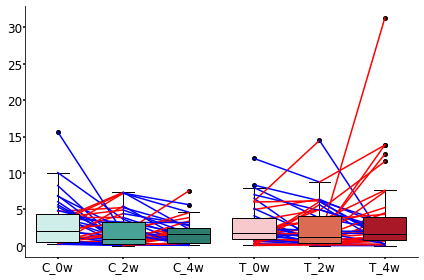

In [53]:
bp = plt.boxplot(
    [vals_c_0w, vals_c_2w, vals_c_4w, vals_t_0w, vals_t_2w, vals_t_4w],
    notch=0,
    labels=d.keys(),
    sym='.',
    widths=0.66,
    vert=True, whis=1.5,
    patch_artist=True,
    flierprops={
       "marker": "k",
       "markerfacecolor": "k",
       "markersize": 8,
       "linestyle": "none",
       "markeredgecolor": "k"
    }
)

# config - boxplot config
# set boxplot line color
lw = 1.0
for box in bp['boxes']:
    box.set(color="black", linewidth=lw)
for box in bp['medians']:
    plt.setp(box, color="black", linewidth=lw)
for box in bp['caps']:
    plt.setp(box, color="black", linewidth=lw)
for box in bp['whiskers']:
    plt.setp(box, ls="solid", color="black", linewidth=lw)

# set boxplot color
for box, color in zip(bp["boxes"], d.values()):
    box.set_facecolor(color)
    
for val_c_0w, val_c_2w, val_c_4w in zip(vals_c_0w, vals_c_2w, vals_c_4w):
    if val_c_2w > val_c_0w:
        plt.plot([1, 2], [val_c_0w, val_c_2w], color="red")
    else:
        plt.plot([1, 2], [val_c_0w, val_c_2w], color="blue")
    
    if val_c_4w > val_c_2w:
        plt.plot([2, 3], [val_c_2w, val_c_4w], color="red")
    else:
        plt.plot([2, 3], [val_c_2w, val_c_4w], color="blue")

for val_t_0w, val_t_2w, val_t_4w in zip(vals_t_0w, vals_t_2w, vals_t_4w):
    if val_t_2w > val_t_0w:
        plt.plot([4, 5], [val_t_0w, val_t_2w], color="red")
    else:
        plt.plot([4, 5], [val_t_0w, val_t_2w], color="blue")
    
    if val_t_4w > val_t_2w:
        plt.plot([5, 6], [val_t_2w, val_t_4w], color="red")
    else:
        plt.plot([5, 6], [val_t_2w, val_t_4w], color="blue")

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# set about tick
plt.tick_params(labelsize=12, length=2, width=1.5, pad=0.6, top=False, right=False)
plt.tight_layout()
plt.savefig("../data_output/box.IgA.pdf")